## Observations and Insights 

'''Observations:
Data like the correlation coefficient (0.84) and the scatter plot linear regression model indicate there is a strong positive correlation between mouse weight and average tumor volume.  Given the weight of the mouse one can fairly adequately predict the average tumor volume.

There are some treatments like the two effective brands of Capomulin and its rival Ramicane that appear to keep more mice alive throughout the complete time period.  The placebo treatment is the control treatment; and while Capomulin and Ramicane perform better than not getting any treatment at all, the Propriva treatment lost more mice (assuming that drops in # of mice per time periods means the missing mice have died) than by receiving the placebo (no treatment).
'''

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(left=mouse_metadata, right=study_results, how="left", on="Mouse ID")
combined_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
len(combined_study_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Find any duplicate rows: multiple rows (data) for the same Mouse ID and Timepoint
find_duplicates = (combined_study_df[["Mouse ID", "Timepoint", "Age_months"]]
                       .set_index("Mouse ID")
                       .groupby(["Mouse ID", "Timepoint"])
                       .count()
                       .rename(columns={"Age_months":"Record Count"})
                  )
find_duplicates
find_duplicates.loc[find_duplicates["Record Count"] > 1]

Record Count
Mouse ID Timepoint              
g989     0                     2
         5                     2
         10                    2
         15                    2
         20                    2

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
combined_study_df.loc[combined_study_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = combined_study_df.loc[combined_study_df["Mouse ID"] != "g989"]

assert "g989" not in clean_study_df

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_df["Mouse ID"].unique())

248

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

study_mean = (clean_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                   .groupby("Drug Regimen")
                                                                   .mean()
             )
study_median = (clean_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                     .groupby("Drug Regimen")
                                                                     .median()
             )
study_var = (clean_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                  .groupby("Drug Regimen")
                                                                  .var()
            )
study_stdev = (clean_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                    .groupby("Drug Regimen")
                                                                    .std()
              )
study_sem = (clean_study_df[["Drug Regimen","Tumor Volume (mm3)"]].set_index("Drug Regimen")
                                                                  .groupby("Drug Regimen")
                                                                  .sem()
              )
study_mean_series = pd.Series(study_mean["Tumor Volume (mm3)"], index=study_mean.index)
study_median_series = pd.Series(study_median["Tumor Volume (mm3)"], index=study_median.index)
study_var_series = pd.Series(study_var["Tumor Volume (mm3)"], index=study_var.index)
study_stdev_series = pd.Series(study_stdev["Tumor Volume (mm3)"], index=study_stdev.index)
study_sem_series = pd.Series(study_sem["Tumor Volume (mm3)"], index=study_sem.index)

# summary_df = pd.DataFrame(study_mean).rename(columns={"Tumor Volume (mm3)": "Mean"})
# # summary_df["Mean"] = study_mean
# summary_df["Median"] = study_median
# summary_df["Variance"] = study_var
# summary_df["Standard Deviation"] = study_stdev
# summary_df["SEM"] = study_sem
summary_df = pd.DataFrame({"Mean":study_mean_series,
                           "Median":study_median_series,
                           "Variance":study_var_series,
                           "Standard Deviation":study_stdev_series,
                           "SEM":study_sem_series}
                         )
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.


## Bar Plots

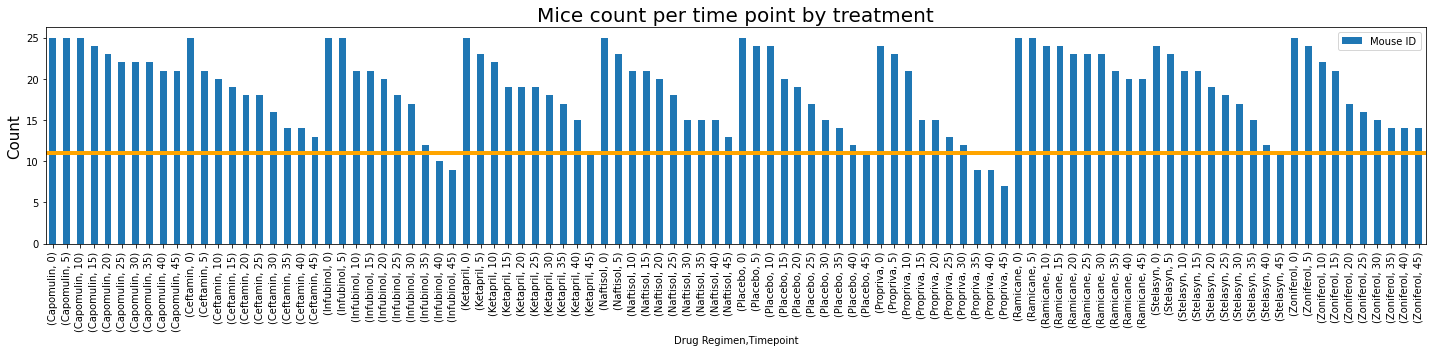

In [30]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_mice_treat = clean_study_df[["Drug Regimen", "Timepoint", "Mouse ID"]].groupby(by=["Drug Regimen", "Timepoint"]).count()
bar_mice_treat.plot(kind="bar", figsize=(20, 5))
plt.title("Mice count per time point by treatment", fontsize=20)
plt.ylabel("Count", fontsize=15)
plt.axhline(y = 11, xmin=0, xmax=100, color="orange", lw=4)
plt.tight_layout()
plt.show()

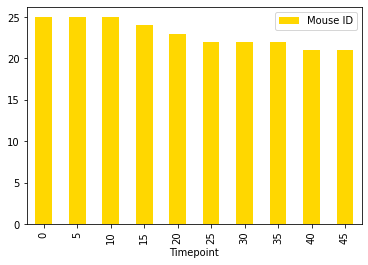

In [65]:

bar_mice_treat = (clean_study_df[["Drug Regimen", "Timepoint", "Mouse ID"]]
                      .loc[clean_study_df["Drug Regimen"] == "Capomulin"]
                      .set_index("Drug Regimen")
                      .groupby(by="Timepoint")
                      .count()
                 )

yvalues=[bar_mice_treat[x] for x in bar_mice_treat]
bar_mice_treat.plot(kind="bar", color="gold")
# handle1, = bar_mice_treat.plot(kind="bar", color="gold")
# plt.legend(handles=handle1, loc="best")
plt.show()
# plt.bar(x=bar_mice_treat.keys, height=yvalues)

In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# plt.bar(bar_mice_treat.keys, bar_mice_treat.values)
# plt.show()

## Pie Plots

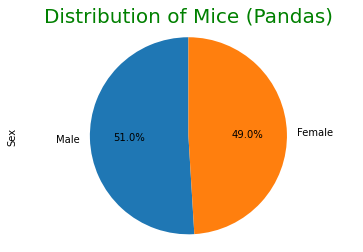

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# pie_y_values = clean_study_df[["Mouse ID", "Sex"]].groupby("Sex").count()
# pie_y_values
g = clean_study_df[["Mouse ID", "Sex"]].set_index("Mouse ID")
f = pd.Series(g["Sex"]).value_counts()
f
f.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Mice (Pandas)", fontsize=20, color="green")
plt.axis("Equal")
plt.show()

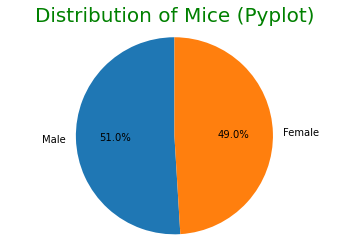

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels=g["Sex"].unique()
plt.pie(f, autopct="%1.1f%%", startangle=90, labels=pie_labels)
plt.title("Distribution of Mice (Pyplot)", fontsize=20, color="green")
plt.axis("Equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
promising_regimens=["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]
max_timepoint=max(clean_study_df["Timepoint"])

# Initialize dictionary that will save each regimen dataframe
final_vols_dict = {}

for regimen in promising_regimens:
    # Filter clean study for mice in final time point with specified regimen
    final_mouse_filter=(clean_study_df["Timepoint"] == max_timepoint) & (clean_study_df["Drug Regimen"] == regimen)
    final_tumor_vol_df = clean_study_df.loc[final_mouse_filter]
    
    #Once filtered, save dataframe into dictionary with regimen key
    final_vols_dict[regimen] = final_tumor_vol_df["Tumor Volume (mm3)"]
    
    #Calculate quartiles, IRQ
    quartiles = final_tumor_vol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    medianq = quartiles[0.5]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Display quartile information
    print(f"Drug Regimen: {regimen}")
    print(f"The lower quartile      : {lowerq:.2f}")
    print(f"The upper quartile      : {upperq:.2f}")
    print(f"The interquartile range : {iqr:5.2f}")
    print(f"The median              : {medianq:.2f}")
    print(f"\nValues below {lower_bound:.2f} or above {upper_bound:.2f} could be outliers.")
    
    # Make a dataframe of the outliers, determine its size to get number of outliers
    outlier_filter = (final_tumor_vol_df["Tumor Volume (mm3)"] < lower_bound) | (final_tumor_vol_df["Tumor Volume (mm3)"] > upper_bound)
    outlier_tumor_vol = final_tumor_vol_df.loc[outlier_filter]
    print(f"Number of outliers      : {len(outlier_tumor_vol)}")
    print("====================================================")

Drug Regimen: Capomulin
The lower quartile      : 32.38
The upper quartile      : 40.16
The interquartile range :  7.78
The median              : 37.31

Values below 20.70 or above 51.83 could be outliers.
Number of outliers      : 0
Drug Regimen: Ceftamin
The lower quartile      : 61.43
The upper quartile      : 67.53
The interquartile range :  6.09
The median              : 64.30

Values below 52.29 or above 76.67 could be outliers.
Number of outliers      : 0
Drug Regimen: Infubinol
The lower quartile      : 62.75
The upper quartile      : 67.69
The interquartile range :  4.93
The median              : 66.08

Values below 55.36 or above 75.08 could be outliers.
Number of outliers      : 0
Drug Regimen: Ramicane
The lower quartile      : 30.98
The upper quartile      : 38.51
The interquartile range :  7.53
The median              : 34.85

Values below 19.69 or above 49.80 could be outliers.
Number of outliers      : 0


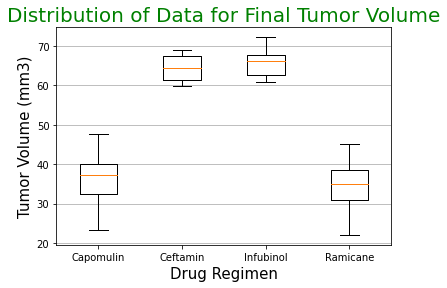

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#  Identify any potential outliers and change their style and color.  Note: no outliers found.
tumor_vol_data = [final_vols_dict[x] for x in promising_regimens]
plt.boxplot(x=tumor_vol_data, labels=promising_regimens)
plt.title("Distribution of Data for Final Tumor Volume", fontsize=20, color="green")
plt.xlabel("Drug Regimen", fontsize=15)
plt.ylabel("Tumor Volume (mm3)", fontsize=15)
plt.ylim=(0,100)
plt.grid(axis="y")
plt.show()

## Line and Scatter Plots

In [13]:
from pprint import pprint

============================ Mouse IDs treated with Capomulin ============================
['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957', 't565', 'i738',
 'w914', 'g288', 'l897', 'b742', 'b128', 'j246', 'j119', 'w150', 'v923', 'g316',
 's710', 'l509', 'r944', 'i557', 'r157']



Select ID to plot:  t565


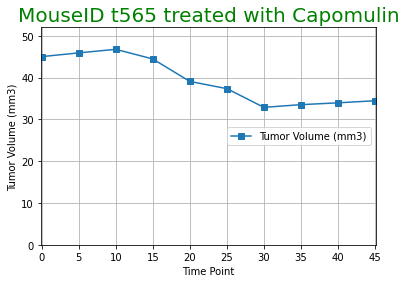

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
treatment = "Capomulin"
mice_to_choose_filter = (clean_study_df["Drug Regimen"] == treatment) & (clean_study_df["Timepoint"] == 0)
candidate_mice = clean_study_df.loc[mice_to_choose_filter, ["Mouse ID"]]

# Display list of mouse IDs on the treatment, ask user to select one, new dataframe with only that mouse ID
print(f"============================ Mouse IDs treated with {treatment} ============================")
pprint(list(candidate_mice["Mouse ID"]), compact=True)
mouse_ID = input(f"\nSelect ID to plot: ")
target_mouse_filter = (clean_study_df["Mouse ID"] == mouse_ID)
target_mouse_df = clean_study_df.loc[target_mouse_filter]

# Plot line graph with selected mouse ID dataframe
x_ticks=[x for x in range(0,max(clean_study_df["Timepoint"]) + 5, 5)]
y_max=round(max(target_mouse_df["Tumor Volume (mm3)"]))
target_mouse_df.plot(kind="line",
                   x="Timepoint",
                   xlabel="Time Point",
                   xticks=x_ticks,
                   xlim=(-0.1, max(x_ticks) + 0.1),
                   y="Tumor Volume (mm3)",
                   ylabel="Tumor Volume (mm3)",
                   ylim=(0, y_max + 5),
                   marker="s"
                   )
plt.title(f"MouseID {mouse_ID} treated with {treatment}", fontsize=20, color="green")
plt.legend(loc="center right")
plt.grid()
plt.show()

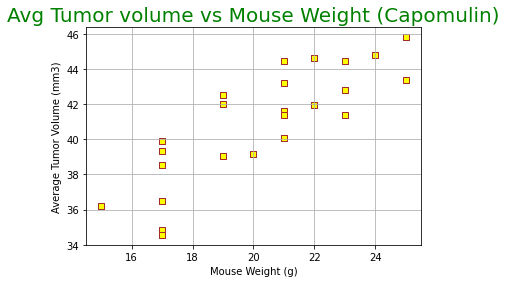

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
treatment="Capomulin"
scatter_mice_filter = (clean_study_df["Drug Regimen"] == treatment)
scatter_plot_df = clean_study_df.loc[scatter_mice_filter].set_index("Mouse ID")
mouse_weight_series = scatter_plot_df["Weight (g)"].groupby(by="Mouse ID").mean()
tumor_vol_series = scatter_plot_df["Tumor Volume (mm3)"].groupby(by="Mouse ID").mean()

plt.scatter(
    x = mouse_weight_series,
    y = tumor_vol_series,
    marker = "s",
    edgecolor = "brown",
    facecolor = "yellow"
)
plt.title(f"Avg Tumor volume vs Mouse Weight ({treatment})", fontsize=20, color="green")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# plt.xlim(0,30)
# plt.ylim(0,48)
plt.grid()
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight_series, tumor_vol_series)

print(f"Correlation between mouse weight and average tumor volume: {correlation[0]:.2f}")

Correlation between mouse weight and average tumor volume: 0.84


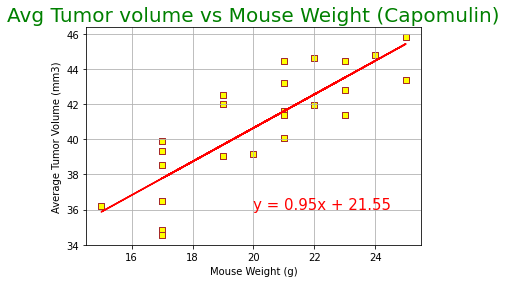

In [23]:
x_values = mouse_weight_series
y_values = tumor_vol_series
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)    # Perform linear regression
regress_values = x_values * slope + intercept                                        # Get x/y values for linear regression linear
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(
                x=x_values,
                y=y_values,
                marker = "s",
                edgecolor = "brown",
                facecolor = "yellow"
           )
plt.plot(x_values,regress_values,"r-")                                               # Add linear regression line to plot
plt.title(f"Avg Tumor volume vs Mouse Weight ({treatment})", fontsize=20, color="green")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()